In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [13]:
def loadimage(name):
    res = []
    for y in range(9):
        for x in range(9):
            n = name + "_" + str(y) + str(x) + ".png"
            res.append(oneimg(n))
    return np.array(res)

def loadclass(name):
    d = np.loadtxt(name + ".class.txt", delimiter=";", dtype="U9")
    d = np.array(d[:,1], dtype=np.uint8)
    return d

def oneimg(path):
    img = Image.open(path).convert('L')
    img = img.resize((28, 28))
    img = np.array(img)
    img = img.astype(np.float32)
    img = np.multiply(img, 1.0 / 255.0)
    return img


In [14]:
x_train = loadimage("img01")
y_train = loadclass("img01")

for i in range(1, 11):
    num = str(i).rjust(2, '0')
    name = "img" + num
    x = loadimage(name)
    y = loadclass(name)
    x_train = np.concatenate((x_train, x))
    y_train = np.concatenate((y_train, y))


In [15]:
len(x_train)


891

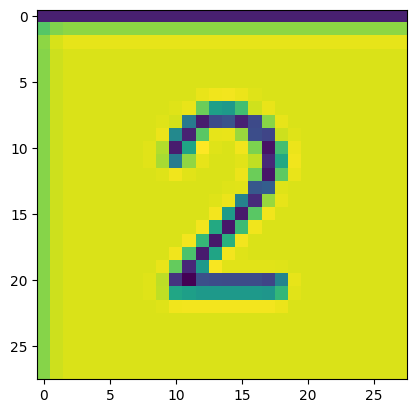

2


In [17]:
n = 1

plt.figure()
plt.imshow(x_train[n])
plt.show()
print(y_train[n])

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10),
])

predictions = model(x_train[:1]).numpy()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(y_train[:1], predictions).numpy()

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])




In [21]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.8350
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.8159
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8339
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.8159
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.8092
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8418
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8249
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8339
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.8350
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8822
Epoch 11/

28/28 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.9259
Epoch 84/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.9282
Epoch 85/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.9203
Epoch 86/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.9181
Epoch 87/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.9203
Epoch 88/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8923
Epoch 89/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2529 - accuracy: 0.9125
Epoch 90/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2626 - accuracy: 0.9226
Epoch 91/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.9158
Epoch 92/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.9315
Epoch 93/100


In [22]:
r = model.predict(x_train)
r.argmax(axis=1)

28/28 [==============================] - 0s 808us/step


array([0, 2, 6, 0, 0, 0, 0, 0, 1, 0, 4, 5, 0, 7, 1, 0, 0, 0, 8, 0, 1, 0,
       0, 6, 0, 7, 0, 0, 0, 0, 1, 3, 2, 6, 8, 0, 5, 3, 8, 0, 0, 0, 0, 1,
       9, 0, 0, 0, 0, 0, 0, 7, 0, 4, 0, 0, 0, 0, 2, 7, 0, 6, 8, 0, 8, 0,
       9, 1, 5, 0, 0, 2, 0, 5, 0, 6, 8, 3, 0, 9, 7, 0, 2, 6, 0, 0, 0, 0,
       0, 1, 0, 4, 5, 0, 7, 1, 0, 0, 0, 8, 0, 1, 0, 0, 6, 0, 7, 0, 0, 0,
       0, 1, 3, 2, 6, 8, 0, 5, 3, 8, 0, 0, 0, 0, 1, 9, 0, 0, 0, 0, 0, 0,
       7, 0, 4, 0, 0, 0, 0, 2, 7, 0, 6, 8, 0, 8, 0, 9, 1, 5, 0, 0, 2, 0,
       5, 0, 6, 8, 3, 0, 9, 7, 0, 8, 0, 0, 0, 0, 4, 2, 0, 3, 0, 0, 0, 0,
       8, 9, 0, 0, 0, 0, 7, 2, 4, 5, 6, 0, 0, 9, 0, 6, 3, 0, 4, 0, 0, 0,
       0, 7, 3, 0, 1, 0, 2, 0, 0, 8, 5, 0, 0, 6, 2, 3, 4, 9, 0, 0, 4, 1,
       2, 0, 0, 9, 8, 0, 0, 9, 0, 0, 3, 0, 6, 0, 6, 0, 0, 4, 0, 0, 1, 3,
       0, 0, 0, 2, 1, 7, 0, 0, 0, 6, 0, 9, 0, 0, 0, 8, 0, 5, 3, 0, 4, 0,
       3, 0, 0, 0, 1, 8, 0, 0, 0, 8, 0, 0, 6, 4, 0, 9, 8, 0, 0, 2, 7, 0,
       0, 1, 0, 0, 3, 0, 9, 0, 0, 2, 7, 5, 0, 1, 9,

In [23]:
model.save("second.mod")

INFO:tensorflow:Assets written to: second.mod/assets
